Analysis of "annotated" user start data

Reads in several million starts into a dataframe to process


In [13]:
# Standard includes
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
filename='/Users/dane/Dropbox/work/datafiles/annotated_starts_09-15.csv'
filename='/Users/dane/src/datatools/ipy/annotated_09-15.csv'

In [14]:
starts=pd.read_csv(filename,low_memory=False)
starts['date'] = pd.to_datetime(starts['date'])
starts['quarter'] = starts.date.apply(lambda x: x.year + int(x.month/3+1)/10)
starts['year'] = starts.date.apply(lambda x: x.year)

In [15]:
starts.user_type.value_counts()

Customer:CDB            4289236
Pirate                  2132728
Internal:Employees      1775341
Academic:Flexible        341986
Evaluator:Demo           269597
Partner:CDB              177378
Internal:StartUpTest      89810
Academic:CDB              59243
Internal:NI               39060
Internal:Reseller         36824
Internal:Training         20237
Evaluator:CDB              2795
Internal:Servers           1435
Unknown                     102
Partner:Sonnet                9
dtype: int64

In [17]:
pt = pd.pivot_table(starts, values='processor', columns='user_type', index='year', aggfunc=len)
pt.fillna(0, inplace=True)
pt['Academic'] = pt['Academic:CDB'] + pt['Academic:Flexible']
pt['Internal'] = pt['Internal:Employees'] + pt['Internal:Servers'] + pt['Internal:StartUpTest'] + pt['Internal:Training']

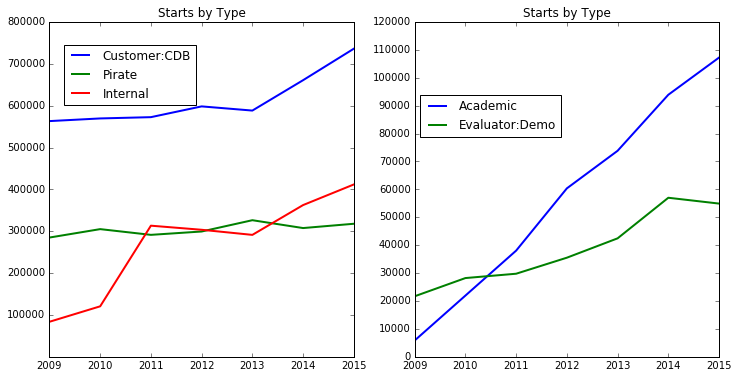

In [33]:
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.figure(1)
plt.subplot(121) # numrows, numcols, fignum
curves = ['Customer:CDB', 'Pirate', 'Internal']
plt.plot(pt[curves], linewidth=2.0)
plt.yticks(list(range(100000,900000,100000)))
plt.gca().set_xticklabels(pt.index.values)
plt.title('Starts by Type')
plt.legend(curves, bbox_to_anchor=[0.5,0.95])
plt.subplot(122)
curves = ['Academic', 'Evaluator:Demo']
plt.plot(pt[curves], linewidth=2.0)
plt.yticks(list(range(0,130000,10000)))
plt.gca().set_xticklabels(pt.index.values)
plt.title('Starts by Type')
plt.legend(curves, bbox_to_anchor=[0.5,0.8])
plt.show()

In [19]:
piv_proc = pd.pivot_table(starts, values='version', columns='processor', index='year', aggfunc=len)
piv_proc.fillna(0, inplace=True)
pt['Academic'] = pt['Academic:CDB'] + pt['Academic:Flexible']
piv_proc['12+'] = piv_proc[12] + piv_proc[16] + piv_proc[20] + piv_proc[24] + piv_proc[32]

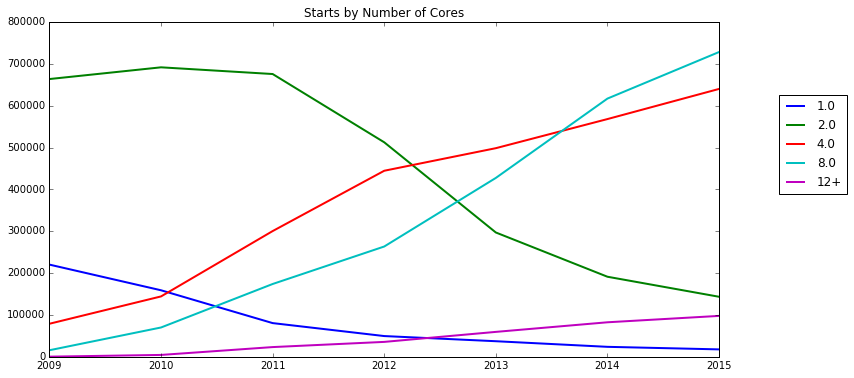

In [20]:
fig = plt.gcf()
fig.set_size_inches(12,6)
curves = [1.0, 2.0, 4.0, 8.0, '12+']
plt.plot(piv_proc[curves], linewidth=2.0)
plt.legend(curves, bbox_to_anchor=[1.2,0.8])
plt.gca().set_xticklabels(pt.index.values)
plt.title('Starts by Number of Cores')
plt.show()

In [21]:
piv_ost = pd.pivot_table(starts, values='version', columns='os_bits', index='year', aggfunc=len)
piv_ost['pct 32-bit all'] = 100* piv_ost['32-bit'] / (piv_ost['32-bit'] + piv_ost['64-bit'])
piv_ost['pct 64-bit all'] = 100* piv_ost['64-bit'] / (piv_ost['32-bit'] + piv_ost['64-bit'])

piv_cust = pd.pivot_table(starts[starts.user_type == 'Customer:CDB'],
                          values='version', columns='os_bits', index='year', aggfunc=len)
piv_ost['pct 32-bit cust'] = 100* piv_cust['32-bit'] / (piv_cust['32-bit'] + piv_cust['64-bit'])
piv_ost['pct 64-bit cust'] = 100* piv_cust['64-bit'] / (piv_cust['32-bit'] + piv_cust['64-bit'])


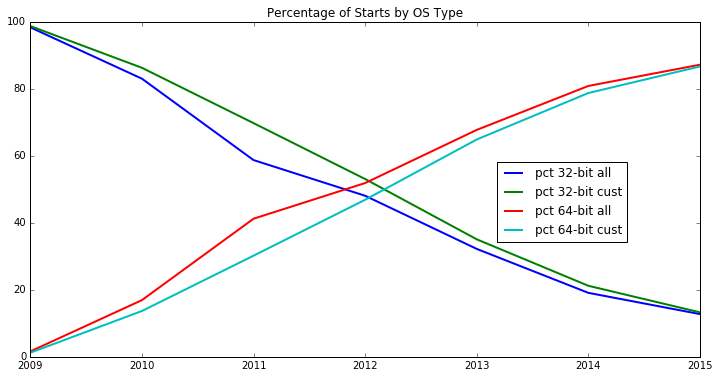

In [22]:
fig = plt.gcf()
fig.set_size_inches(12,6)
curves = ['pct 32-bit all','pct 32-bit cust', 'pct 64-bit all', 'pct 64-bit cust']
plt.plot(piv_ost[curves], linewidth=2.0)
plt.legend(curves, bbox_to_anchor=[.9,0.6])
plt.gca().set_xticklabels(pt.index.values)
plt.title('Percentage of Starts by OS Type')
plt.show()

In [23]:
# dump out in highchart format for 'Starts by OS Versions'
piv_ost.fillna(0, inplace=True)
labels = [str(l) for l in piv_ost.index.values]
print('var labels = {};'.format(labels))
print('var series_data = [')

for line in curves:
    print('    { name: "%s",' % line)
    data = [int(pt*10)/10 for pt in piv_ost[line]]
    print('      data: {}'.format(data))
    print('    },')
print('];')
    
    

var labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015'];
var series_data = [
    { name: "pct 32-bit all",
      data: [98.3, 83.0, 58.7, 48.1, 32.2, 19.1, 12.7]
    },
    { name: "pct 32-bit cust",
      data: [98.7, 86.3, 69.7, 53.0, 35.0, 21.2, 13.2]
    },
    { name: "pct 64-bit all",
      data: [1.6, 16.9, 41.2, 51.8, 67.7, 80.8, 87.2]
    },
    { name: "pct 64-bit cust",
      data: [1.2, 13.6, 30.2, 46.9, 64.9, 78.7, 86.7]
    },
];


In [24]:
# dump out in highchart format for 'Customer Starts by Number of Cores'

piv_proc = pd.pivot_table(starts[starts.user_type=='Customer:CDB'], values='version', columns='processor', index='year', aggfunc=len)
piv_proc.fillna(0, inplace=True)
piv_proc['12+'] = piv_proc[12] + piv_proc[16] + piv_proc[20] + piv_proc[24] + piv_proc[32]
curve_cols = [1,2,4,8,'12+']
curve_labels = ['1', '2', '4', '8', '12 or more']
chart_data = piv_proc[curve_cols]

labels = [str(l) for l in chart_data.index.values]
print('var g2_labels = {};'.format(labels))
print('var g2_series = [')

for i, line in enumerate(curve_cols):
    print('    { name: "%s",' % curve_labels[i])
    data = [int(pt*10)/10 for pt in chart_data[line]]
    print('      data: {}'.format(data))
    print('    },')
print('];')

var g2_labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015'];
var g2_series = [
    { name: "1",
      data: [109373.0, 73205.0, 36656.0, 23607.0, 14976.0, 10284.0, 8000.0]
    },
    { name: "2",
      data: [394801.0, 377408.0, 294657.0, 205796.0, 124237.0, 85087.0, 55488.0]
    },
    { name: "4",
      data: [46499.0, 82351.0, 144260.0, 210860.0, 229382.0, 289682.0, 338091.0]
    },
    { name: "8",
      data: [11996.0, 27438.0, 56011.0, 96754.0, 136215.0, 178941.0, 224587.0]
    },
    { name: "12 or more",
      data: [268.0, 3595.0, 19400.0, 28871.0, 48341.0, 67696.0, 75834.0]
    },
];


In [25]:
# dump out in highchart format for 'Starts by User Type'
pt = pd.pivot_table(starts, values='processor', columns='user_type', index='year', aggfunc=len)
pt.fillna(0, inplace=True)
pt['Academic'] = pt['Academic:CDB'] + pt['Academic:Flexible']
pt['Internal'] = pt['Internal:Employees'] + pt['Internal:Servers'] + pt['Internal:StartUpTest'] + pt['Internal:Training']

prefix = 'graph3a'
curves = ['Customer:CDB', 'Pirate', 'Internal']
chart_data = pt

labels = [str(l) for l in chart_data.index.values]
print('var {}_labels = {};'.format(prefix, labels))
print('var {}_series = ['.format(prefix))

for line in curves:
    print('    { name: "%s",' % line)
    data = [int(pt*10)/10 for pt in chart_data[line]]
    print('      data: {}'.format(data))
    print('    },')
print('];')
prefix = 'graph3b'
curves = ['Academic', 'Evaluator:Demo']
chart_data = pt

labels = [str(l) for l in chart_data.index.values]
print('var {}_labels = {};'.format(prefix, labels))
print('var {}_series = ['.format(prefix))

for line in curves:
    print('    { name: "%s",' % line)
    data = [int(pt*10)/10 for pt in chart_data[line]]
    print('      data: {}'.format(data))
    print('    },')
print('];')

var graph3a_labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015'];
var graph3a_series = [
    { name: "Customer:CDB",
      data: [563200.0, 569561.0, 572619.0, 598347.0, 588366.0, 660970.0, 736173.0]
    },
    { name: "Pirate",
      data: [284963.0, 305069.0, 291398.0, 299390.0, 326391.0, 307631.0, 317886.0]
    },
    { name: "Internal",
      data: [83679.0, 120616.0, 313313.0, 303530.0, 291334.0, 362548.0, 411803.0]
    },
];
var graph3b_labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015'];
var graph3b_series = [
    { name: "Academic",
      data: [5845.0, 21943.0, 38057.0, 60371.0, 73839.0, 93923.0, 107251.0]
    },
    { name: "Evaluator:Demo",
      data: [21695.0, 28222.0, 29777.0, 35522.0, 42459.0, 57006.0, 54916.0]
    },
];


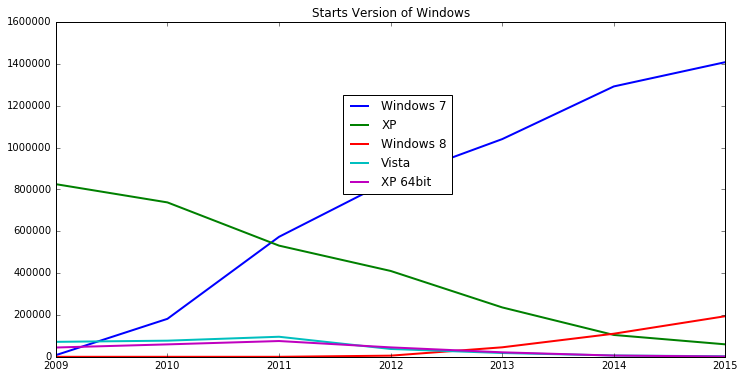

In [26]:
piv_win = pd.pivot_table(starts,
                         values='version', columns='win_version', index='year', aggfunc=len)
piv_win.fillna(0, inplace=True)
fig = plt.gcf()
curves = ['Windows 7', 'XP', 'Windows 8', 'Vista', 'XP 64bit']
fig.set_size_inches(12,6)
plt.plot(piv_win[curves], linewidth=2.0)
plt.legend(curves, bbox_to_anchor=[.6,0.8])
plt.gca().set_xticklabels(piv_win.index.values)
plt.title('Starts Version of Windows')
plt.show()

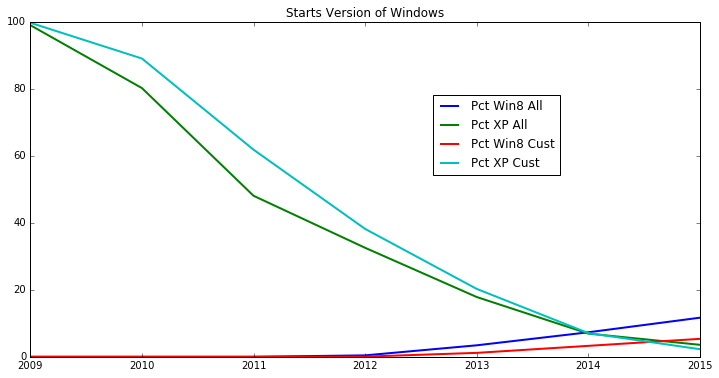

In [27]:
s2 = starts[starts.win_version.isin(['XP', 'Windows 8', 'Windows 7'])]
piv_win = pd.pivot_table(s2,
                         values='version', columns='win_version', index='year', aggfunc=len)

piv_cwin = pd.pivot_table(s2[s2.user_type.isin(['Customer:CDB', 'Evaluator:Demo'])],
                         values='version', columns='win_version', index='year', aggfunc=len)
piv_win.fillna(0, inplace=True)
piv_cwin.fillna(0, inplace=True)
piv_win['Pct Win8 All'] = 100*piv_win['Windows 8'] / (piv_win['Windows 8']+piv_win['XP']+piv_win['Windows 7'])
piv_win['Pct XP All'] = 100*piv_win['XP'] / (piv_win['Windows 8']+piv_win['XP']+piv_win['Windows 7'])
piv_win['Pct Win8 Cust'] = 100*piv_cwin['Windows 8'] /(piv_cwin['Windows 8']+piv_cwin['XP']+piv_cwin['Windows 7'])
piv_win['Pct XP Cust'] = 100*piv_cwin['XP'] /(piv_cwin['Windows 8']+piv_cwin['XP']+piv_cwin['Windows 7'])
piv_win.fillna(0, inplace=True)
curves = ['Pct Win8 All', 'Pct XP All', 'Pct Win8 Cust', 'Pct XP Cust']
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.plot(piv_win[curves], linewidth=2.0)
plt.legend(curves, bbox_to_anchor=[.8,0.8])
plt.gca().set_xticklabels(piv_win.index.values)
plt.title('Starts Version of Windows')
plt.show()